# Numerical Optimization HW1(0915)
### 20211108 Donghyuk Jung

Univariate Optimization : Fibonacci search and golden section search
seeking initial bound

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as m

#### Fibonacci search implementation

In [3]:
def fibonacciSearch(a, b, f, N):
    # Generate Fibonacci numbers in fibo
    F=[1,1]
    for i in range(2,N+1):
        F+=[F[i-1]+F[i-2]]
    
    for n in range(N,2,-1):
        L=b-a
        x1=a+F[n-2]/F[n]*L
        x2=b-F[n-2]/F[n]*L
        if f(x1)<f(x2): a=x1
        else: b=x2 
    return a, b

#### Golden section search implementation

In [148]:
def goldenSectionSearch(a, b, f, N):
    r= 1.61803398875 #golden ratio (1+sqrt5)/2
    for n in range(N,2,-1):
        L=b-a
        x1=a+L*r/(1+r)
        x2=b-L*r/(1+r)
        if f(x1)<f(x2): a=x1
        else: b=x2 
    return a, b

#### Seeking initial bound implementation

In [149]:
def seekingInitialBound(x1,f):
    a,b=0,0
    d=0.1
    f_l, f_0, f_r=f(x1-d), f(x1),f(x1+d)
#     print("initial : %2.3f %2.3f %2.3f"%(    f_l, f_0, f_r))
    if f_l>=f_0 and f_0>= f_r : 
#         print("case 1")
        x2=x1+d
        x0=x1-d
        k=1
#         print("init : %2.3f %2.3f %2.3f %d"%(x0,x1,x2,k))
        while f(x2)<f(x1) : 
            x0,x1,x2=x1,x2,x2+k*d
            k*=2
#             print("x : %2.3f %2.3f %2.3f %d"%(x0,x1,x2,k))
#             print("F : %2.3f %2.3f %2.3f\n"%(f(x0),f(x1),f(x2)))
        a,b=x0, x2
    elif f_l<=f_0 and f_0<= f_r : 
#         print("case 2")
        x2=x1-d
        x0=x1+d
        d=-d
        k=1
#         print(d)
#         print("init : %2.3f %2.3f %2.3f %d"%(x0,x1,x2,k))
#         print("F : %2.3f %2.3f %2.3f\n"%(f(x0),f(x1),f(x2)))
        while f(x2)<f(x1) : 
            x0,x1,x2=x1,x2,x2+k*d
            k*=2
#             print("x : %2.3f %2.3f %2.3f %d"%(x0,x1,x2,k))
#             print("F : %2.3f %2.3f %2.3f\n"%(f(x0),f(x1),f(x2)))
        a,b=x2, x0        
    else : 
#         print("case 3(lucky)")
        a,b = x1-d, x1+d

    return a, b

In [150]:
def f(x):
    return (x+3)**2-3

In [151]:
a,b=seekingInitialBound(-5,f)
goldenSectionSearch(a,b,f,5)

(-2.716718427000216, -2.582971010998213)

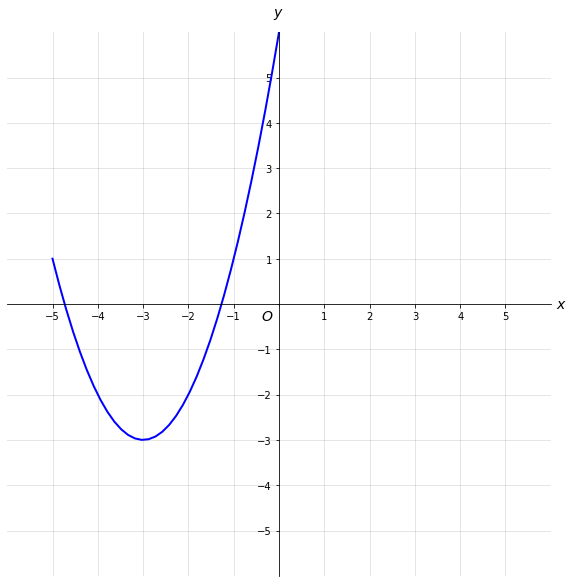

In [136]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1


fig, ax = plt.subplots(figsize=(10, 10))
 
fig.patch.set_facecolor('#ffffff')


ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')


ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_xlabel('$x$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$y$', size=14, labelpad=-21, y=1.02, rotation=0)
 
plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
    transform=ax.transAxes,
         horizontalalignment='center', fontsize=14)


x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)


ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

 
x = np.linspace(-5, 10, 100)
y = f(x)
 
plt.plot(x, y, 'b', linewidth=2)